## Regression Modeling Warmup
1. Using pydataset, load the faithful dataset and read it's documentation.

2. What is pearson's r for the two variables?

3. Visualize the relationship between the variables.

4. Build a linear model that predicts eruptions based on waiting.

5. Create a visualization with your predictions

    - waiting should be on the x axis, and eruptions on the y
    - Use color to differentiate the actual vs predicted values.
    - Add a descriptive title.
    - Change the y ticks such that they are all integers (i.e. no decimals)
    - Add the root mean squared error of your predictions as an annotation

In [41]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [64]:
# df = data('faithful', show_doc=True)
df = data('faithful')
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Pearsons R correlation between eruptions and waiting time

In [65]:
df.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


In [66]:
stats.pearsonr(df.eruptions, df.waiting)

(0.900811168321813, 8.129958506616769e-100)

Visualization of eruptions and waiting.  Appears to be a linear correlation along with clusters.

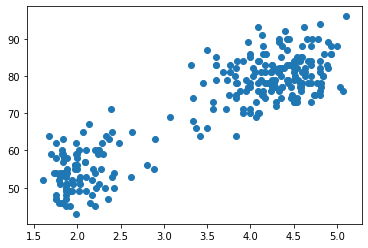

In [67]:
pyplot.scatter(df.eruptions, df.waiting)

Linear model predicting eruptions based on waiting time

In [68]:
X, y = df[['waiting']], df['eruptions']

In [69]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=123)

In [70]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8114607609733095

Text(50, 5, 'RMSE: 0.4947')

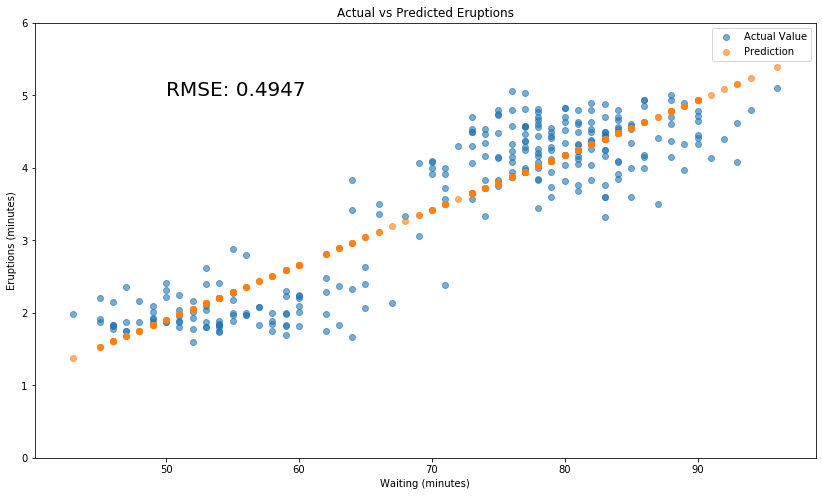

In [79]:
from math import sqrt
from sklearn.metrics import mean_squared_error

predictions = reg.predict(X)

rmse = sqrt(mean_squared_error(y, predictions))

plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Actual Value', alpha=.6)
plt.scatter(X, predictions, label='Prediction', alpha=.6)
plt.xlabel('Waiting (minutes)')
plt.ylabel('Eruptions (minutes)')
plt.title('Actual vs Predicted Eruptions')
plt.legend()
# plt.yticks() - just using the function without an argument will show the ticks 
plt.yticks(range(0, 7))
plt.text(50, 5, f'RMSE: {rmse:.4f}', size=20)

### How to do this with Melting